In [1]:
from QHD import *

import matplotlib.pyplot as plt
import numpy as np

# The Double Well Potential

**1. The Potential**

We first must define the potential along with its parameters, as described below.

**Parameters**

$m=1836$ This is mass

$\lambda=m$ This is a constant which can be set equal to the mass, `m`, or any other value

$B=2$ This is simply a constant which can be changed as well




**Potential**

$V(q)=(q^2 - B)^2$

In [2]:
B1 = 5
B2 = 0
q = np.linspace(-10, 10, 1000)

potential1 = (q**2 - B1)**2
potential2 = (q**2 - B2)**2

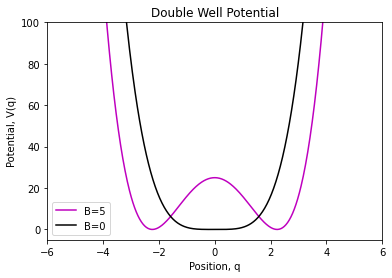

In [3]:
plt.plot(q, potential1, "m")
plt.plot(q, potential2, "k")
plt.title("Double Well Potential")
plt.ylabel("Potential, V(q)")
plt.xlabel("Position, q")
plt.ylim(-5, 100)
plt.xlim(-6, 6)
plt.legend(["B=5", "B=0"])
plt.savefig('doublewell_vVq.png')
plt.show()

### 2. Derivation of  QHD formulas

Here, we use the pysces library, able to derive the equations of motion in the QHD method. We will need to define the `q`, `p`, and `p2` variables. In order to do this, we must first calculate the first and second derivatives of the potential of interest, defined in section 1. We will also use a change of variables as well, described below.

Please note that because the potential is quadratic, we do not need a change of variables. 

**2.1 The First and Second Derivatives of the Potential**

To take the derivatives, we must represent the potential symbollically. This can be done by:

In [6]:
# First, we must define all the parameters as stated in section 1 as symbols:

q, B= symbols("q, B")

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym =(q**2 - B)**2

Now that the potential is represented symbolically, we may take the first and second derivatives, described by `diff1` and `diff2`, respectively. Here you can use the `diff` function, which is found in the `sympy` library. This fuction takes the derivative symbolically with respect to the variable of interest, in this case `q`

In [7]:
diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

diff1, diff2

**2.2 Solving for the Equations of Motion**

In [8]:
# Again, we must first define all variables as symbols. #

q, p, x, x2, xp, dt, mass, alpha, D = symbols("q, p, x, x2, xp, dt, mass, alpha, D")



########## EOM Calculations ##########

q1 = QHD_int(q, 1, dt)

#print(q1)

p1 = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff1)))

#print(p1)

p21 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff2)).replace("Derivative(v(q), q)", str(diff1)))

#print(p21)

Now, we are ready to make plots of the data based on the EOM's as computed above.

# 3. Graphing

**3.1 Generating Time-Dependent Values**

We will first define all of the parameters necessary to perform the QHD calculations. The below parameters are defined as followed:

`hbar`: Plancks constant

`convert`: A conversion factor for the mass

`mass`: The mass of the particle in the potential. In this case, the mass of a hydrogen atom is used.

`q0`: The starting position value

`p0`: The starting momentum value

`s0`:

`ps0`:

`B`: A constant in the double well potential

`dt`: The time step used

In [ ]:
##### Constants #####

hbar = 0.6582  # eV * fs

# Feel free to change any of the below parameters to observe what happens when you change them
q0 = -2.5
p0 = 0.0
s0 = 0.05
ps0 = 0.0
mass = 1

B = 2
dt = 0.1

Below, the initial conditions are described. These initial conditions describe a gaussian wavepacket, and do not need to be changed.

In [32]:
##### Initial Conditions (Do Not Change) #####

t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2 = 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 0.0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2

p = eval(str(p1))
q = eval(str(q1))
p = eval(str(p1))

Below, empty lists are created to store the data generated. Feel free to create your own lists to examine how different variables change over time.

In [ ]:
##### Empty Lists for Data Storage: #####

q_list = []
p_list = []

**Q2.** Create an empty list for `q2` values and observe how this variable changes over time.

Now that the parameters have been defined, we can compute the desired values of position and momentum over a given time interval.

**Q3.** Try changing the time step (`dt`) or the finish time (`t_f`).

In [33]:
#### --- Do Not Change Anything In This Cell --- #####

### Time how long it takes to compute ###

import time 
begin = time.time()


### Compute the y values ###

dt = 0.1
t_i = 0.0
t_f = 1000

y_list = []

while t_i <= t_f:
    
    p = eval(str(p1))
    
    q = eval(str(q1))

    p = eval(str(p1))
    
    t_i = t_i + dt
    
    q_list.append(q)
    p_list.append(p)

    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Total runtime is 7.891022205352783


For the x values, we create a range with `(t_i, t_f, dt)` as the parameters. Due to the increasing nature of `t_i`, the initial value of `0.0` is used in its place.

In [34]:
x_list = np.arange(0, t_f, dt)

**3.2 Graphing Position versus Time**

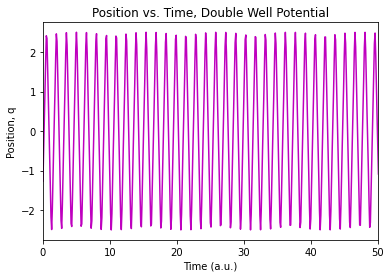

In [35]:
x_list = np.arange(0, 1000, 0.1)
plt.plot(x_list, q_list, "m")
#plt.plot([0, 1000], [0, 0], "k-")
plt.title("Position vs. Time, Double Well Potential")
plt.xlim(0, 50)
plt.xlabel("Time (a.u.)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Position, q")
plt.savefig('doublewell_qVt_B5_015.png')
plt.show()

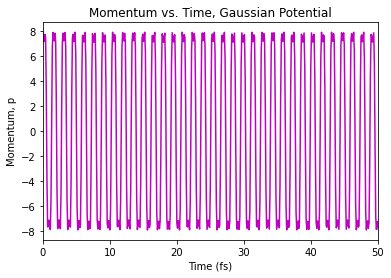

In [36]:
plt.plot(x_list, p_list, 'm')
plt.title("Momentum vs. Time, Gaussian Potential")
plt.xlim(0, 50)
plt.xlabel("Time (fs)")
#plt.ylim(-0.5, 0.5)
plt.ylabel("Momentum, p")
plt.savefig('double_well_pvt_B5_015.png')
plt.show()

**Q4.** How does decreasing `B` affect the position and momentum? How does it affect the shape of the potential?

**Q5.** How does changing `q0` to `0.15` affect the position and momentum graphs?